[View in Colaboratory](https://colab.research.google.com/github/subroy13/Python_Tutorials/blob/master/Tensorflow/tensorflow_mnist_basic.ipynb)

# Tensorflow with MNIST
  Here, we will be using a simple neural network with the popular mnist dataset. We will create the complete dense layers (or the hidden layers) from scratch using a softmax acitvation function.

In [0]:
# importing the libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Load the MNIST dataset and visualize

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0   #these help the matrices to have entries between 0 and 1

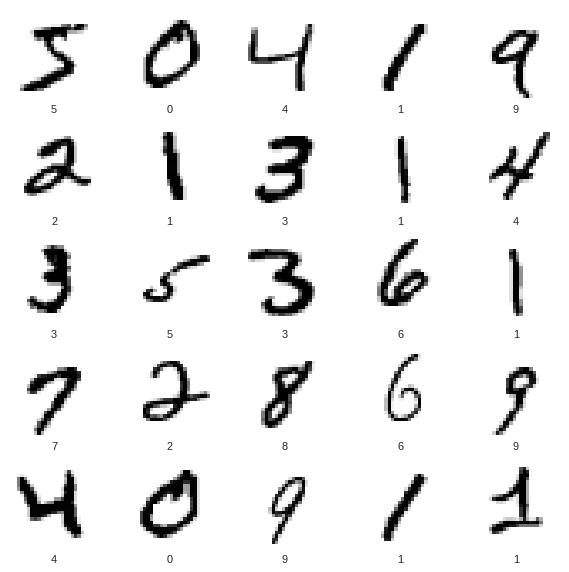

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [0]:
print(y_train[0:10])

[5 0 4 1 9 2 1 3 1 4]


We see that we need to change the y_train to one-hot tensors rather than the indices.

In [0]:
y_train = tf.one_hot(y_train, depth = 10)
print(y_train[0:10])

Tensor("strided_slice:0", shape=(10, 10), dtype=float32)


Similarly, change the y_test...

In [0]:
y_test = tf.one_hot(y_test, depth = 10)  #there are 10 classes

## Building the Neural Network

In [0]:
X = tf.placeholder(tf.float32, [None, 784])  # we will be feeding (28*28) size vectors
W = tf.Variable(tf.zeros([784, 10]))  # works as a weight matrix
b = tf.Variable(tf.zeros([10]))  # the bias vector

#finally our outout will be,
y = tf.nn.softmax(tf.matmul(X, W) + b)

In [0]:
# making placeholder to hold the actual labels
y_actual = tf.placeholder(tf.float32, [None, 10])

In [0]:
# defining the loss and optimizer
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_actual * tf.log(y), reduction_indices = [1]))  #this is our loss
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)   #this is the optimizer with 0.5 as learning rate
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_actual, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Initializing Tensorflow Session

In [0]:
sess = tf.InteractiveSession()  #creates an interactive session
tf.global_variables_initializer().run()  #run the session to initialize the variables
y_train = y_train.eval()  #evaluate to convert it into numpy array

In [0]:
for i in range(1000):
  X_batch = x_train[(i*100):((i+1)*100)]
  X_batch = np.reshape(X_batch, [-1, 784])
  
  y_batch = y_train[(i*100):((i+1)*100)]
  
  sess.run(train_step, feed_dict = {X: X_batch, y_actual: y_batch})

## Evaluating Accuracy on Test data

In [0]:
x_test = np.reshape(x_test, [-1, 784])
y_test = y_test.eval()  #evaluate to convert into numpy array
print("The Accuracy is ", sess.run(accuracy, feed_dict = {X: x_test, y_actual: y_test}))

('The Accuracy is ', 0.9053)
